# <font color='#2B17B0'>CIENCIA DE DATOS APLICADA A FINANZAS</font>
Sesión 9, 2022-06-12<br>
Carlos Crespo Elizondo<br>
EGADE BUSINESS SCHOOL

# <font color='#2B17B0'>Intro Portafolios</font>

In [1]:
from herramientas import herramientas_financieras as hf
from matplotlib.patches import FancyArrow
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

In [5]:
def mezcla_colores(peso, color1, color2):
    # Descomponemos los colores en sus componentes R, G, B
    componente1 = tuple(int(color1[i:i+2], 16)/255 for i in (0, 2, 4))
    componente2 = tuple(int(color2[i:i+2], 16)/255 for i in (0, 2, 4))

    # Calculamos la media ponderada de las componentes
    color_mezclado = [(peso*componente1[i] + (1-peso)*componente2[i]) for i in range(3)]
    
    # Convertimos el color mezclado a formato hexadecimal
    return '#{:02x}{:02x}{:02x}'.format(*(int(c*255) for c in color_mezclado))


In [4]:
def portafolio(df_2activos, r, pocos=True):
    """
    Cálculo vectorizado de los pesos, retornos y volatilidad
    de un portafolio de 2 activos.
    requiere un dataframe con los retornos y volatilidades
    de cada uno de los activos y su correlación
    """
    if pocos == True:
        a = np.arange(0.0, 1.1, .1)
    elif pocos == False:
        a = np.arange(0.0, 1.01, .01)
    df_ = pd.DataFrame()
    df_['w_rojo'] = a
    df_['w_azul'] = 1 - df_['w_rojo']
    df_['retorno'] = (
        df_2activos['rojo'].loc['ret'] * df_['w_rojo'] +
        df_2activos['azul'].loc['ret'] * df_['w_azul']
    )

    df_['sigma'] = (
        (df_2activos['rojo'].loc['sigma']**2)*(df_['w_rojo']**2) +
        (df_2activos['azul'].loc['sigma']**2)*(df_['w_azul']**2) +
        (2 * 
         df_['w_rojo'] * 
         df_['w_azul'] * 
         df_2activos['rojo'].loc['sigma'] * 
         df_2activos['azul'].loc['sigma'] *
         r
        ) 
    )**.5
    
    return df_

In [2]:
def fig_2activos():
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title('Gráfica de dos activos')

    plt.xlabel('Riesgo', fontsize = 10)
    plt.ylabel('Retorno', fontsize = 10)
    # Limitar los ticks a unicamente los valores de ret y sigma en df_2activos:
    plt.xticks(df_2activos.loc['sigma'])
    plt.yticks(df_2activos.loc['ret'])

    #lista de colores 
    list_color=['red', 'blue']
    i = 0

    """
    For loop para imprimir la ubicación de cada activo, asi como las líneas verticales y horizontales.
    Para que las líneas sobrepasaran el punto le sume + .01 a la longitud de la líneas
    Poner atención como cambia el color de acuerdo al contador 'i':
    """
    for activo in df_2activos.columns:
        ax.hlines(df_2activos[activo].loc['ret'], 0, df_2activos[activo].loc['sigma'] + .01, lw=.8, ls='--', color=list_color[i])
        ax.vlines(df_2activos[activo].loc['sigma'], 0, df_2activos[activo].loc['ret'] + 0.01, lw=.8, ls='--', color=list_color[i])
        plt.scatter(df_2activos[activo].loc['sigma'], df_2activos[activo].loc['ret'], marker = '.', s=1500, label= activo, color=list_color[i], alpha=.15)
        plt.scatter(df_2activos[activo].loc['sigma'], df_2activos[activo].loc['ret'], marker = '.', s=300, label= activo, color=list_color[i])
        i += 1

    #Quitar las líneas del perímetro de la gráfica   
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    #Agregar flechas para el eje de las X's y Y's
    arrow_x = FancyArrow(0, 0, .35, 0, head_width=0.005, head_length=0.006, fc='gray', ec='gray', linewidth=0.1)
    arrow_y = FancyArrow(0, 0, 0, 0.15, head_width=0.005, head_length=0.006, fc='gray', ec='gray', linewidth=0.1)
    ax.add_patch(arrow_x)
    ax.add_patch(arrow_y);

In [3]:
def fig_pregunta():
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title=('sdsd')

    plt.xlabel('Riesgo', fontsize = 14)
    plt.ylabel('Retorno', fontsize = 14)
    # Limitar los ticks a unicamente los valores de ret y sigma en df_2activos:
    plt.xticks(df_2activos.loc['sigma'])
    plt.yticks(df_2activos.loc['ret'])

    #lista de colores 
    list_color=['red', 'blue']
    i = 0

    """
    For loop para imprimir la ubicación de cada activo, asi como las líneas verticales y horizontales.
    Para que las líneas sobrepasaran el punto le sume + .01 a la longitud de la líneas
    Poner atención como cambia el color de acuerdo al contador 'i':
    """
    for activo in df_2activos.columns:
        ax.hlines(df_2activos[activo].loc['ret'], 0, df_2activos[activo].loc['sigma'] + .01, lw=.8, ls='--', color=list_color[i])
        ax.vlines(df_2activos[activo].loc['sigma'], 0, df_2activos[activo].loc['ret'] + 0.01, lw=.8, ls='--', color=list_color[i])
        plt.scatter(df_2activos[activo].loc['sigma'], df_2activos[activo].loc['ret'], marker = '.', s=1500, label= activo, color=list_color[i], alpha=.15)
        plt.scatter(df_2activos[activo].loc['sigma'], df_2activos[activo].loc['ret'], marker = '.', s=300, label= activo, color=list_color[i])
        i += 1

    #Quitar las líneas del perímetro de la gráfica   
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    #Agregar flechas para el eje de las X's y Y's
    arrow_x = FancyArrow(0, 0, .35, 0, head_width=0.005, head_length=0.006, fc='gray', ec='gray', linewidth=0.1)
    arrow_y = FancyArrow(0, 0, 0, 0.15, head_width=0.005, head_length=0.006, fc='gray', ec='gray', linewidth=0.1)
    ax.add_patch(arrow_x)
    ax.add_patch(arrow_y)

    ax.scatter(.25, .08, marker = '.', s=1500, label= activo, color='green', alpha=.15)
    ax.scatter(.25, .08, marker = '.', s=300, label= activo, color='green')
    ax.set_xticks([.2,.25,.3])
    ax.set_yticks([.04, .08, .12])
    ax.plot([.2 , .3], [.04, .12], lw=.8, ls='--', color='green')
    ax.hlines(.08, 0, .25 + .01, lw=.8, ls='--', color='green')
    ax.vlines(.25, 0, .08 + 0.01, lw=.8, ls='--', color='green')

In [6]:
'''
En esta función utilizo dos maneras diferentes de ir cambiando los colores de las figuras:
1. De manera vectorizada con pandas
2. A través de un for loop y de una variable incremental
'''

def fig_portafolio():
        
    rho = .1

    df_portafolio2activos = portafolio(df_2activos, rho)
    df_portafolio2activos['colores'] = df_portafolio2activos.apply(lambda row: mezcla_colores(row['w_rojo'], 'ff0000', '0018ff'), axis=1)

    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title('Portafolios con diferentes pesos en los activos "Azul" y "Rojo"; ' + r'$\rho$' + f'={rho}')

    plt.yticks([.04,.12])

    ax.scatter(df_portafolio2activos['sigma'].iloc[1:-1], df_portafolio2activos['retorno'].iloc[1:-1], color=df_portafolio2activos['colores'].iloc[1:-1], s=100)

    colores=['#ff0000', '#0018ff']

    i = 0
    for activo in df_2activos.columns:
        plt.scatter(df_2activos[activo].loc['sigma'], df_2activos[activo].loc['ret'], marker = '.', s=1500, label= activo, color=colores[i], alpha=.15)
        plt.scatter(df_2activos[activo].loc['sigma'], df_2activos[activo].loc['ret'], marker = '.', s=300, label= activo, color=colores[i])
        i += 1

    ax.set_xlabel('sigma')
    ax.set_ylabel('retorno')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False);


In [7]:

def fig_port_dif_correlacion():
    rho=.1
    list_color = ['red', 'blue']

    df_portafolio2activos = portafolio(df_2activos, rho)
    list_rho = np.arange(0, 1.01, .1)
    fig, ax = plt.subplots(figsize=(12,6))

    for rho in list_rho:
        df_portafolio2activos = portafolio(df_2activos, rho, False)
        ax.plot(df_portafolio2activos['sigma'], df_portafolio2activos['retorno'], label=f'rho={rho:.1f}')

    i = 0
    for activo in df_2activos.columns:
        plt.scatter(df_2activos[activo].loc['sigma'], df_2activos[activo].loc['ret'], marker = '.', s=1500, color=list_color[i], alpha=.15)
        plt.scatter(df_2activos[activo].loc['sigma'], df_2activos[activo].loc['ret'], marker = '.', s=300, color=list_color[i],)
        i += 1

    ax.set_xlabel('sigma')
    ax.set_ylabel('retorno')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.legend(frameon=False);

* Vamos a ver lo que yo considero lo más padre de todas las finanzas
* Y espero que cuando terminemos lo vean igual de emocionados que yo
* Lo que vamos a ver son las bases de la construcción de portafolios
* Si logran razonar lo que vamos la construcción de portafolios se les hará lógica y obvia

## <font color='#2B17B0'>Retornos y volatilidad de 2 activos</font>

In [8]:
df_2activos = pd.DataFrame({
    "rojo":{'ret':.04, 'sigma':.2},
    "azul":{'ret':.12, 'sigma':.3}})
df_2activos

,rojo,azul
ret,0.04,0.12
sigma,0.20,0.30


* Quiero explicar lo que vamos
* Vamos a tomar dos activos:
    1. Activo Azul
    1. Activo Rojo
* Y vamos a observarlo en un espacio/dimensión de riesgo/retorno (o marco de media/varianza).
* Donde tenemos en el eje de las x's el riesgo(sigma) y el eje de las Y's el retorno


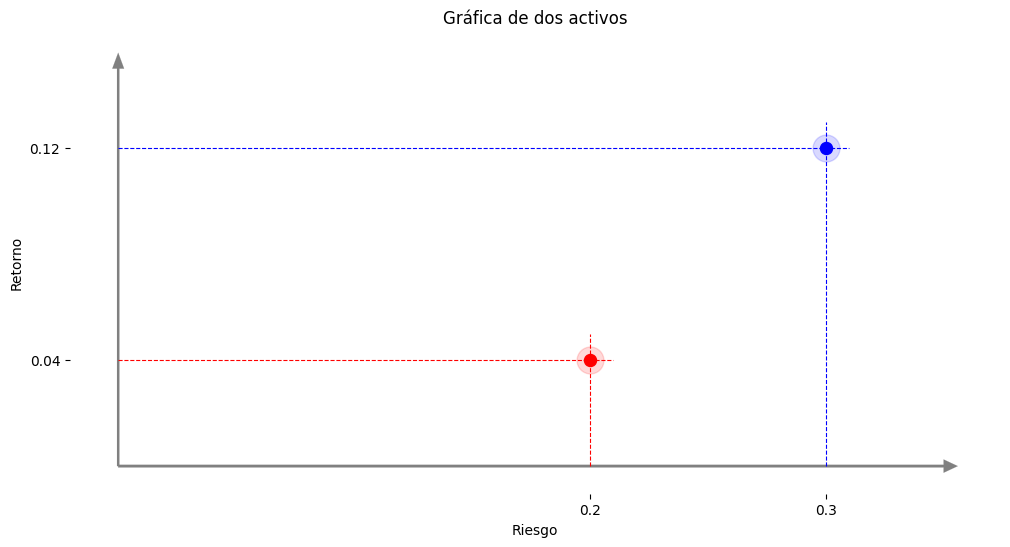

In [9]:
fig_2activos()

### Portafolio compuesto por 50% <font color='blue'>activo azul</font> y 50% <font color='red'>activo rojo</font>

* Como se comporatría un portafolio que está 100% en el activo azul y 0% en el activo rojo?
    * Cual es su retorno y su sigma?
        * El portafolio al estar 100% en azul, se comportará exactamente como el activo AZUL
        * Es obvio
* Que pasaría si ahora el portafolio lo revalanceamos a 0% en el activo azul y 100% en el activo rojo?
    * También es obvio, actua como el activo rojo<br><br>
    
    
* Ahora voy a hacer una pregunta que porfavor no la contesten, solo meditenla un poco:
    * Que pasaría si pongo el 50% de mi dinero en el activo Azul y 50% en el activo rojo?
    * Como se comportaría ese portafolio?
    
    

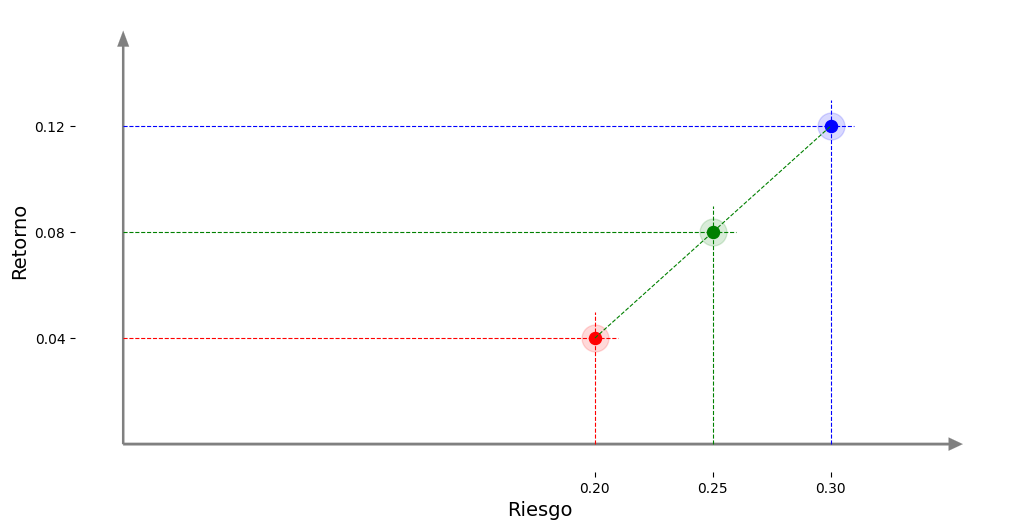

In [10]:
fig_pregunta()

* La parte que tiene correcta es el retorno
    * El retorno de un portafolio, no es nada más que retorno promedio ponderado de todos los componentes del portafolio.  No hay problema, todo esta claro, su cálculo, etc.
    * Lo que en un principio parecería hasta algo extraño es del lado del riesgo
    * De hecho la volatilidad de este portafolio __NO LA PODEMOS CONTESTAR CON LA INFORMACION QUE TENEMOS HASTA ESTE MOMENTO__
    * Por que?  
        * Por que depende unica y exclusivamente de la correlación entre el activo Azul y Rojo
<br><br>
* Si el rojo y el azul, están perfectamente correlacionados
    * Se comportan como el mismo activo
    * Suben iguales
    * Bajan iguales
    * Solo en ese caso podrás ver que la volatilidad es la mitad entre los dos
* Pero si no están correlacionados:
    * Uno sube cuando el otro baja
    * Uno gira a la derecha, cuando el otro gira a la izquierda
    * En este caso la combinación será menos volatil
        * No será la mitad entre una y otra
        * Va ser menos que eso
        * Y entre menos correlación tengan, más baja será la volatilidad del portafolio
* Y esto es la magia de la construcción de portafolios

### Cálculo del retorno de un portafolio de 2 activos

$$\Large R_{w_A, w_B}=w_A*R_A + w_B*R_B$$

### Cálculo de la volatilidad de un portafolio de 2 activos (fórmula teórica)

$$\Large \sigma^2_{w_A, w_B}=\sigma^2_{A}w^2_{A}+\sigma^2_{B}w^2_{B}+2w_Aw_B\sigma_A\sigma_B\rho_{A,B}$$

$$\Large \sigma_{w_a, w_b}=\sqrt{\sigma^2_{w_A, w_B}}$$

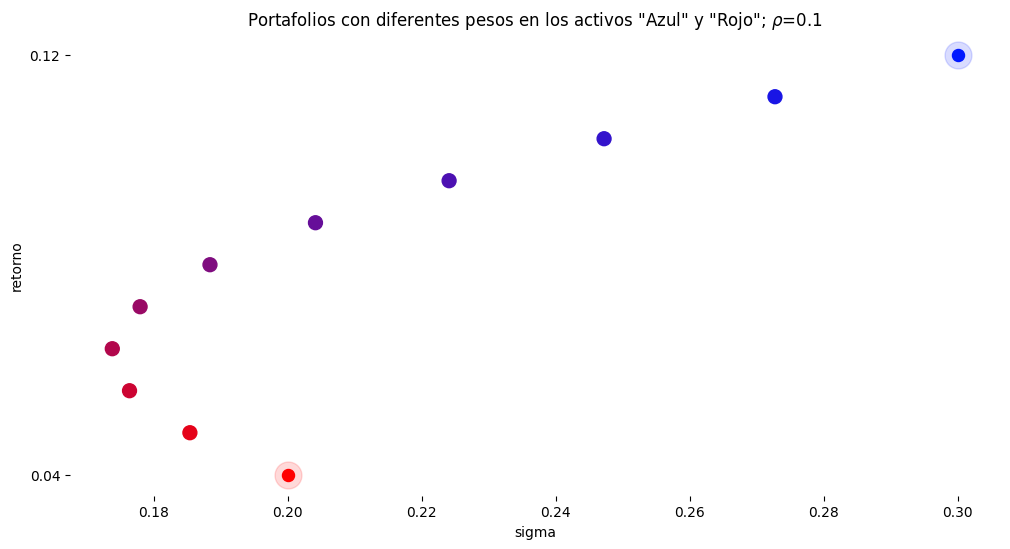

In [11]:
fig_portafolio()

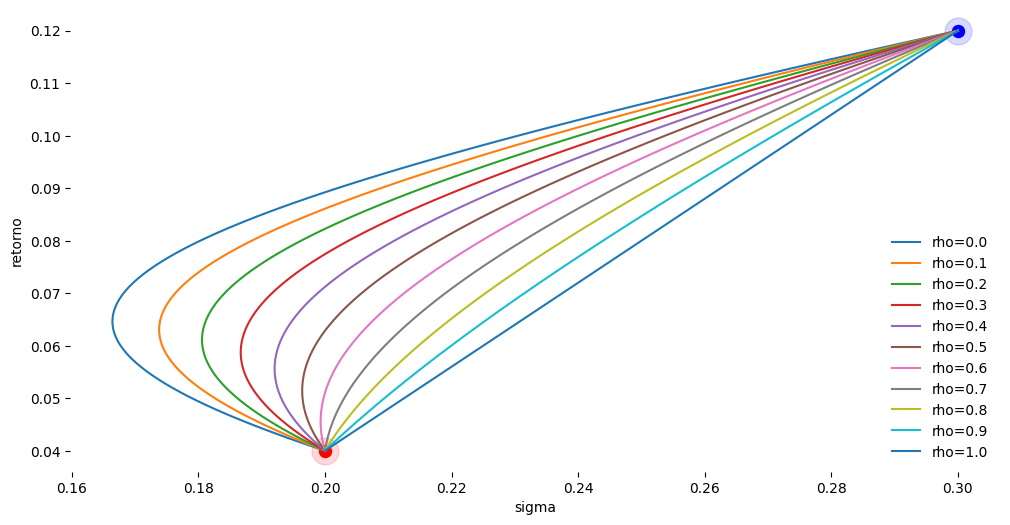

In [12]:
fig_port_dif_correlacion()